In [11]:
import pandas as pd
import numpy as np
from sklearn import tree, cross_validation, metrics
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("german-credit-data",header=-1,sep='\\s+')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [3]:
y = data[24]
X = data.iloc[:, 0:-1]

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,6,4,12,5,5,3,4,1,67,...,1,0,0,1,0,0,1,0,0,1
1,2,48,2,60,1,3,2,2,1,22,...,1,0,0,1,0,0,1,0,0,1
2,4,12,4,21,1,4,3,3,1,49,...,1,0,0,1,0,0,1,0,1,0
3,1,42,2,79,1,4,3,4,2,45,...,1,0,0,0,0,0,0,0,0,1
4,1,24,3,49,1,3,3,4,4,53,...,1,1,0,1,0,0,0,0,0,1


In [5]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
dot_data = tree.export_graphviz(clf, out_file="small_tree.out",  
                         filled=True, rounded=True,  
                         special_characters=True)

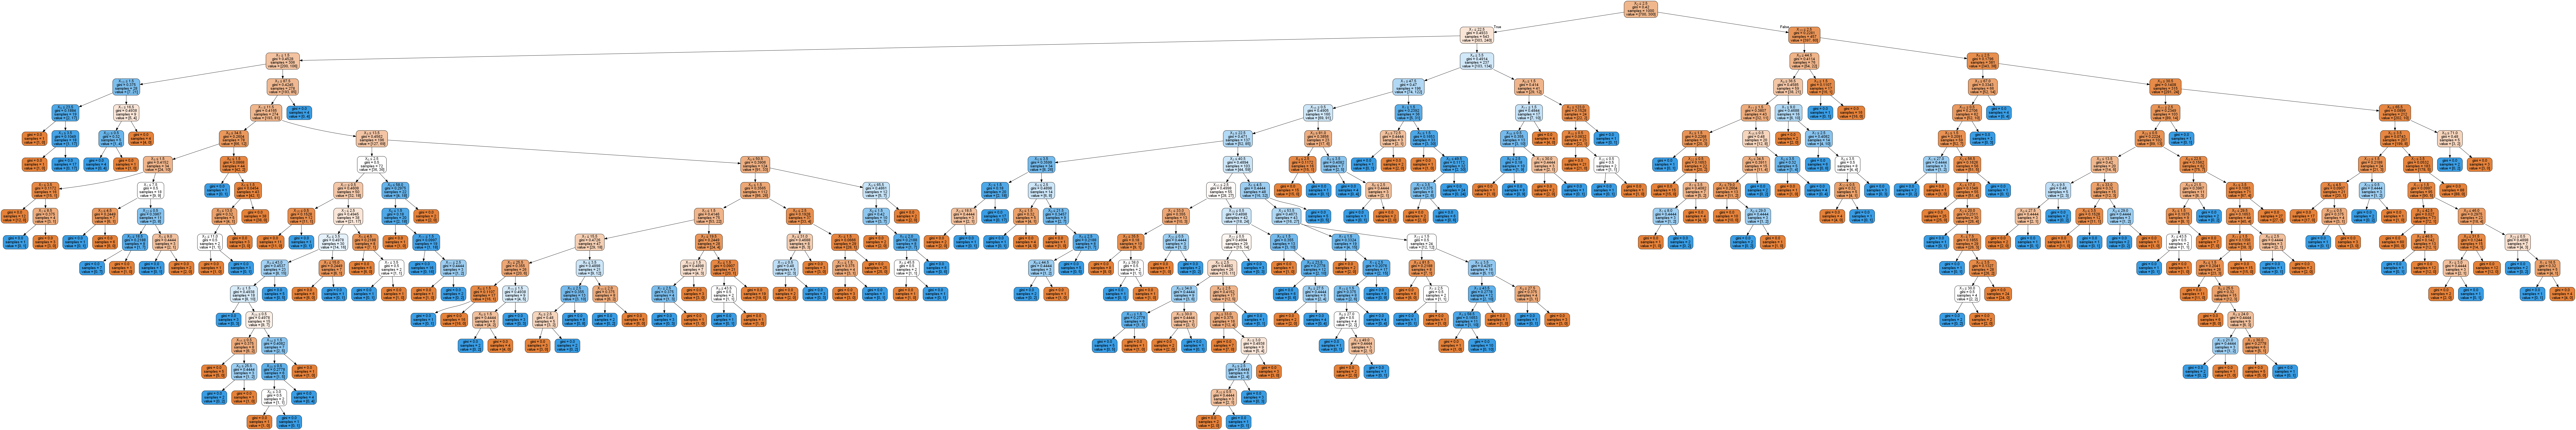

In [7]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

In [8]:
f = open('graph1.png', 'wb')
f.write(graph.create_png())
f.close()

In [10]:
print(np.mean(y-1))

0.3


Коричневым цветом обозначены вершины, в которых преобладает класс 1 ("Good" из описания).

Первый split (X0) - по величине счета в банке(checking account), переход с меньшим ведет в более "холодную" (в которой преобладает класс 'Bad') вершину.

Для клиентов с меньшим счетом второй split по сроку кредита - на короткий срок выдают охотнее.

In [13]:
depths = range(1, 20)
cv = []
train = []
for d in depths:
    clf = tree.DecisionTreeClassifier(max_depth=d)
    cv.append(cross_validation.cross_val_score(clf, X, y).mean())
    clf.fit(X, y)
    train.append(metrics.accuracy_score(y, clf.predict(X)))

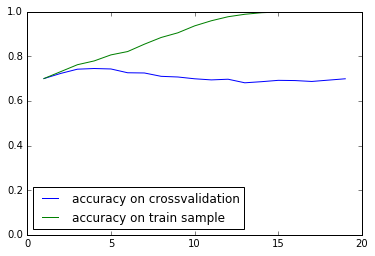

In [15]:
plt.plot(depths, cv, label='accuracy on crossvalidation')
plt.plot(depths, train, label='accuracy on train sample')
plt.legend(loc='best')
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.show()

Как видим, при maxdepth > 4 дерево заметно переобучается